In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
root = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(root, 'proc', 'final_cgm_dataset.csv'), encoding = 'utf-8-sig')

/var/folders/8g/_dzxhc2n0gd7gd_s_lbkz36r0000gn/T/ipykernel_68747/4060018436.py:2: DtypeWarning: Columns (436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,511) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, 'proc', 'final_cgm_dataset.csv'), encoding = 'utf-8-sig')


In [4]:
columns = ['bg', 'insulin', 'activity', 'carbs', 'hr', 'steps']
df_reduced = df[[*columns]]

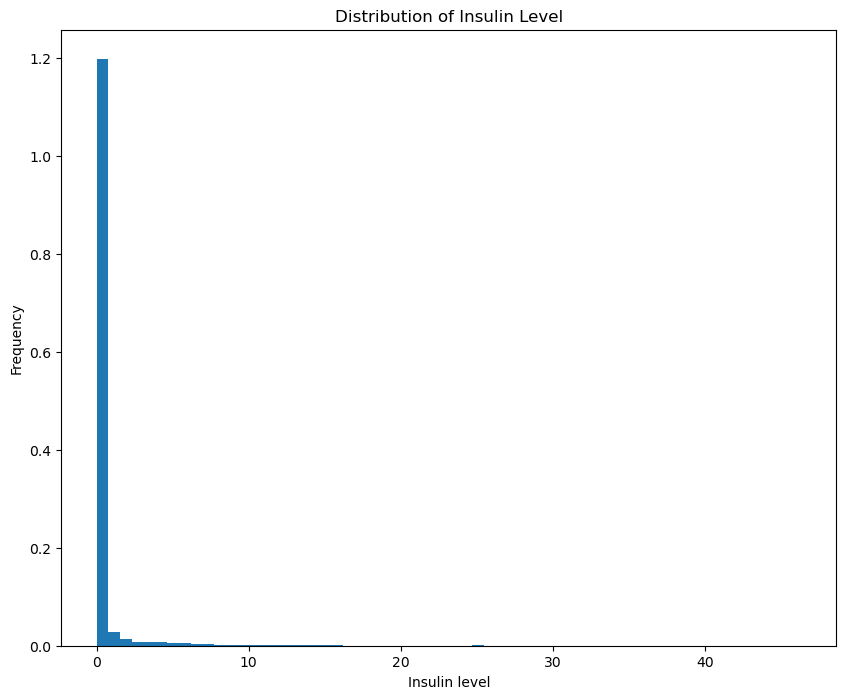

In [5]:
plt.figure(figsize = (10,8))
plt.hist(df_reduced['insulin'], bins = 60, density = True)
plt.title('Distribution of Insulin Level')
plt.xlabel('Insulin level')
plt.ylabel('Frequency')
plt.show()

In [19]:
df_reduced['insulin'].describe()

count    167651.000000
mean          0.438645
std           1.729372
min           0.000000
25%           0.058300
50%           0.083300
75%           0.170100
max          46.311000
Name: insulin, dtype: float64

In [6]:
print(df_reduced['bg'].mean())
print(df_reduced['bg'].std())
print(df_reduced['bg'].median())

8.278754851431136
2.9969596711834763
7.7


In [11]:
ins = df_reduced['insulin'].fillna(np.median(df_reduced['insulin']))
bg = df_reduced['bg'].fillna(np.mean(df_reduced['bg']))

In [8]:
mask = (ins > 1)
len(ins[mask])

11340

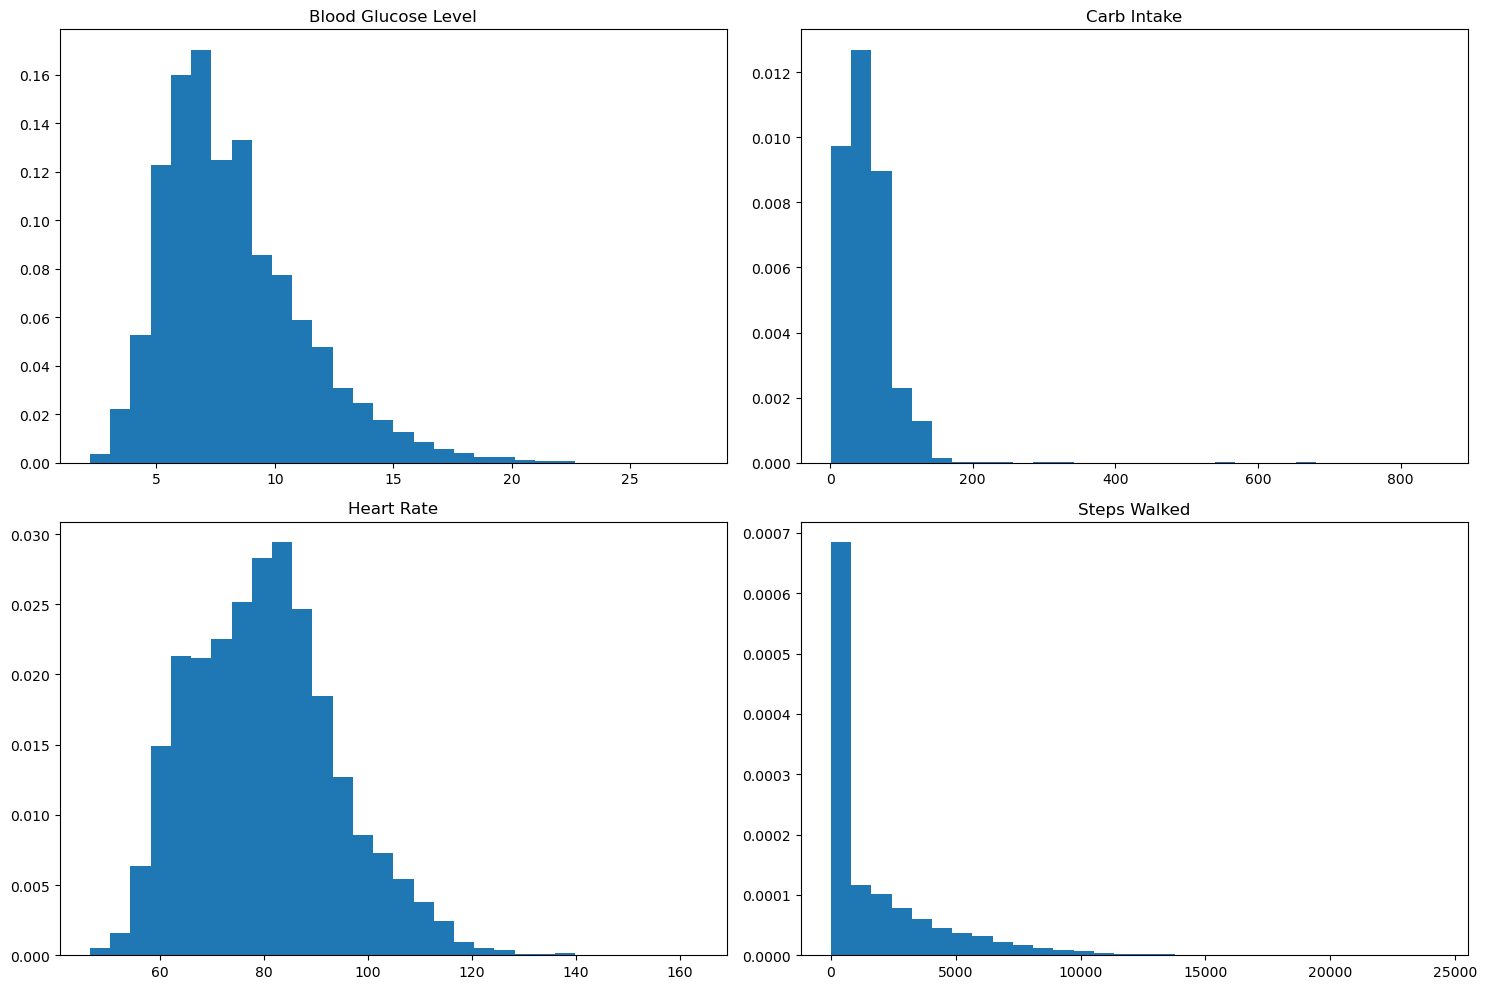

In [14]:
carbs = df_reduced['carbs'].dropna()
hr = df_reduced['hr'].dropna()
steps = df_reduced['steps'].dropna()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
axes[0,0].hist(bg, bins = 30, density = True)
axes[0,0].set_title('Blood Glucose Level')

axes[0,1].hist(carbs, bins = 30, density = True)
axes[0,1].set_title('Carb Intake')

axes[1,0].hist(hr, bins = 30, density = True)
axes[1,0].set_title('Heart Rate')

axes[1,1].hist(steps, bins = 30, density = True)
axes[1,1].set_title('Steps Walked')

plt.tight_layout()
plt.show()